In [2]:

from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch
from PIL import Image
import requests
device = "cuda:1" if torch.cuda.is_available() else "cpu"

model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-7b")
processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b")

model.to(device)

url = "https://raw.githubusercontent.com/salesforce/LAVIS/main/docs/_static/Confusing-Pictures.jpg"


/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-02-07 19:51:01,716] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Loading checkpoint shards: 100%|██████████| 4/4 [02:12<00:00, 33.09s/it]


1


In [11]:
url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png'
real_image = Image.open(requests.get(url, stream=True).raw).convert('RGB')

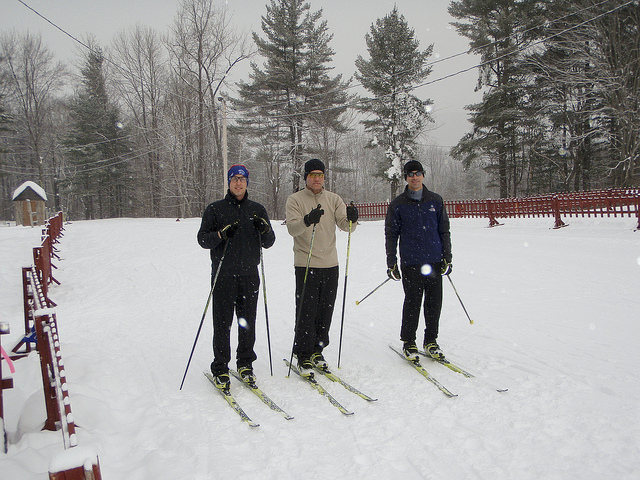

In [3]:
import os
import random
from PIL import Image
IMAGE_FOLDER = "/home/ubuntu/latest_llava/llava_1dot5data/coco/train2017"

# Get a list of all .jpg files in the folder
jpg_files = [file for file in os.listdir(IMAGE_FOLDER) if file.endswith(".jpg")]

# Randomly pick a file from the list
random_file = random.choice(jpg_files)

# Construct the full file path
file_path = os.path.join(IMAGE_FOLDER, random_file)

# Open the image using PIL's Image module
random_cocoimage = Image.open(file_path)

# Display the image
random_cocoimage


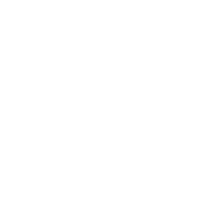

In [6]:
width = 224
height = 224
blank_image = Image.new('RGB', (width, height), 'white')
blank_image

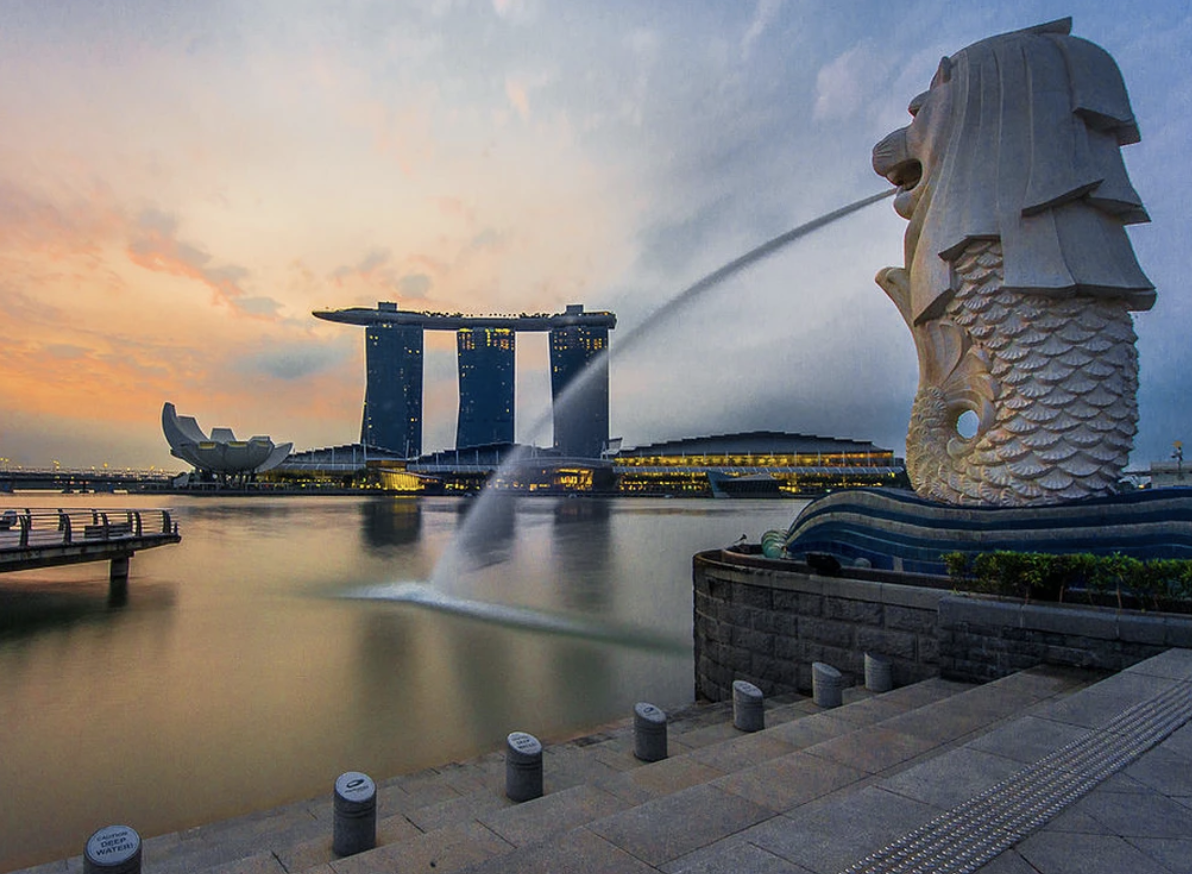

In [5]:
image

In [17]:
prompt = "How can I create a blank image using python Image library"
inputs = processor(images=real_image, text=prompt, return_tensors="pt").to(device)

outputs = model.generate(
        **inputs,
        do_sample=False,
        num_beams=5,
        max_length=256,
        min_length=1,
        top_p=0.9,
        repetition_penalty=1.5,
        length_penalty=1.0,
        temperature=1,
)
generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0].strip()
print(generated_text)

? To create a blank image using the Python Imaging Library (PIL), you can use the PIL.Image.new() method to create a new image object. Then, you can use the PIL.ImageOps.fill() method to fill the image with a color of your choice, such as white or black. Finally, you can use the PIL.Image.save() method to save the image to a file or display it on the screen.


# Test loading blip-2

import requests
from PIL import Image

url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
display(image.resize((596, 437)))

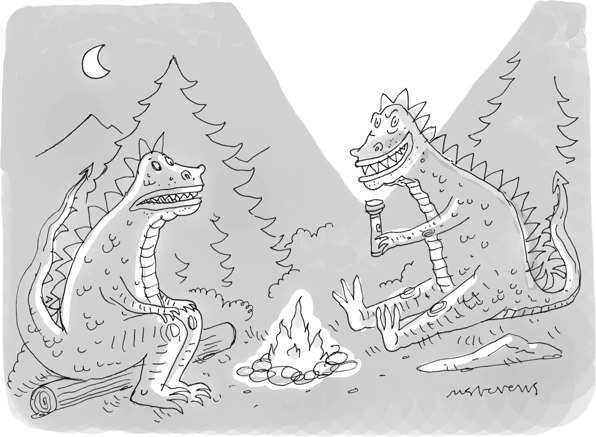

In [1]:
import requests
from PIL import Image

url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
display(image.resize((596, 437)))

In [2]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
model_id = 'Salesforce/blip2-flan-t5-xxl'
processor = AutoProcessor.from_pretrained(model_id)
model = Blip2ForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.float16)

/home/ubuntu/mambaforge-pypy3/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-02-10 07:41:59,254] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


preprocessor_config.json: 100%|██████████| 432/432 [00:00<00:00, 3.48MB/s]
tokenizer_config.json: 100%|██████████| 2.54k/2.54k [00:00<00:00, 24.0MB/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 29.7MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 35.9MB/s]
special_tokens_map.json: 100%|██████████| 2.20k/2.20k [00:00<00:00, 19.0MB/s]
config.json: 100%|██████████| 6.89k/6.89k [00:00<00:00, 36.6MB/s]
pytorch_model.bin.index.json: 100%|██████████| 128k/128k [00:00<00:00, 277MB/s]
pytorch_model-00001-of-00006.bin: 100%|██████████| 9.37G/9.37G [03:08<00:00, 49.6MB/s]
pytorch_model-00002-of-00006.bin: 100%|██████████| 9.87G/9.87G [02:59<00:00, 55.0MB/s]
pytorch_model-00003-of-00006.bin: 100%|██████████| 9.99G/9.99G [03:20<00:00, 49.9MB/s]
pytorch_model-00004-of-00006.bin: 100%|██████████| 10.0G/10.0G [03:23<00:00, 49.0MB/s]
pytorch_model-00005-of-00006.bin: 100%|██████████| 9.70G/9.70G [03:02<00:00, 53.3MB/s]
pytorch_model-00006-of-00006.bin: 100%|██████████| 526M/

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
context = [
   ("What is a dinosaur holding?", "a torch"),
   ("Where are they?", "In the woods.")
]
question = "What for?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Question: What is a dinosaur holding? Answer: a torch. Question: Where are they? Answer: In the woods.. Question: What for? Answer:
a campfire
